In [8]:
import re
import urllib
from bs4 import BeautifulSoup as BS
import pprint
import pandas as pd
import numpy
import urllib
import scipy.optimize
import random
from collections import defaultdict
import nltk
import string
from nltk.stem.porter import *

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

# load in all the modules we're going to need
import collections
from nltk.util import ngrams # function for making ngrams
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
nltk.download('stopwords')
set(stopwords.words('english'))

import os

from os import path
from wordcloud import WordCloud

nltk.download('vader_lexicon')

# first, we import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package punkt to /Users/kenmckee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kenmckee/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kenmckee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kenmckee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
url = "http://www.godamongdirectors.com/scripts/citizenkane.shtml"
html = urllib.request.urlopen(url).read()
#print(html)

In [10]:
soup  = BS(html, 'html.parser')
#print(soup.title.string)

#text = print(soup.get_text())
text = soup.get_text()

def textscrub(s):
    """Lower text and remove punctuation, articles and extra whitespace."""
    def remove_articles(text):
        return re.sub(r'\b(a|an|the)\b', ' ', text)

    def white_space_fix(text):
        return ' '.join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        return ''.join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix(remove_articles(remove_punc(lower(s)))) 
words = textscrub(text)

#print(words)

In [20]:

sid = SentimentIntensityAnalyzer()
scorest = sid.polarity_scores(text)
scoresw = sid.polarity_scores(words)
print("text result")
for key in sorted(scorest):
        print('{0}: {1}, '.format(key, scorest[key]), end='')
        
print("words result")
for key in sorted(scoresw):
        print('{0}: {1}, '.format(key, scoresw[key]), end='')

text result
compound: 1.0, neg: 0.065, neu: 0.832, pos: 0.103, words result
compound: 1.0, neg: 0.076, neu: 0.808, pos: 0.116, 

In [17]:
tokenized = words.split(" ")
stop_words = set(stopwords.words('english'))
tokenx = [w for w in tokenized if not w in stop_words]
tokenx = []
for w in tokenized:
    if w not in stop_words:
        tokenx.append(w)
#print(tokenized)
#print(tokenx)

list(tokenx)

['citizen',
 'kane',
 '\x05citizen',
 'kane',
 'herman',
 'j',
 'mankiewicz',
 'amp',
 'orson',
 'welles',
 'typeddonated',
 'john',
 'powers',
 'jon',
 'reifler',
 'prologue',
 'fade',
 'ext',
 'xanadu',
 'faint',
 'dawn',
 '1940',
 'miniature',
 'window',
 'small',
 'distance',
 'illuminated',
 'around',
 'almost',
 'totally',
 'black',
 'screen',
 'camera',
 'moves',
 'slowly',
 'towards',
 'window',
 'almost',
 'postage',
 'stamp',
 'frame',
 'forms',
 'appear',
 'barbed',
 'wire',
 'cyclone',
 'fencing',
 'looming',
 'early',
 'morning',
 'sky',
 'enormous',
 'iron',
 'grille',
 'work',
 'camera',
 'travels',
 'shown',
 'gateway',
 'gigantic',
 'proportions',
 'holds',
 'top',
 'huge',
 'initial',
 'k',
 'showing',
 'darker',
 'darker',
 'dawn',
 'sky',
 'beyond',
 'see',
 'fairytale',
 'mountaintop',
 'xanadu',
 'great',
 'castle',
 'sillhouette',
 'summit',
 'little',
 'window',
 'distant',
 'accent',
 'darkness',
 'dissolve',
 'series',
 'setups',
 'closer',
 'great',
 'window'

In [7]:
output = list(ngrams(tokenx,3))
#list(output)

from collections import Counter
ncount = collections.Counter(output)
ncount.most_common(30)

[(('charles', 'foster', 'kane'), 38),
 (('mr', 'kane', 'kane'), 25),
 (('dissolve', 'dissolve', 'int'), 14),
 (('mr', 'bernstein', 'bernstein'), 14),
 (('camera', 'pulls', 'back'), 13),
 (('dissolve', 'int', 'kanes'), 9),
 (('mrs', 'kanes', 'boardinghouse'), 7),
 (('kanes', 'boardinghouse', 'day'), 7),
 (('boardinghouse', 'day', '1870'), 7),
 (('int', 'kanes', 'office'), 7),
 (('int', 'city', 'room'), 7),
 (('dissolve', 'front', 'page'), 7),
 (('mr', 'leland', 'leland'), 7),
 (('new', 'york', 'enquirer'), 5),
 (('front', 'page', 'enquirer'), 5),
 (('walter', 'p', 'thatcher'), 5),
 (('dissolve', 'int', 'city'), 5),
 (('chicago', 'enquirer', 'night'), 5),
 (('enquirer', 'night', '1914'), 5),
 (('city', 'editor', 'yes'), 5),
 (('yes', 'mr', 'kane'), 5),
 (('city', 'room', 'enquirer'), 5),
 (('people', 'united', 'states'), 5),
 (('dissolve', 'int', 'susans'), 5),
 (('int', 'susans', 'room'), 5),
 (('xanadu', 'night', '1940'), 5),
 (('pulls', 'back', 'showing'), 4),
 (('fade', 'fade', 'int'

In [10]:



from collections import Counter
tcount = collections.Counter(tokenx)

tcount.most_common(20)

[('kane', 800),
 ('mr', 234),
 ('bernstein', 212),
 ('leland', 209),
 ('susan', 186),
 ('dissolve', 148),
 ('thompson', 119),
 ('emily', 105),
 ('dont', 102),
 ('one', 90),
 ('enquirer', 89),
 ('see', 88),
 ('thatcher', 85),
 ('know', 85),
 ('im', 85),
 ('charles', 82),
 ('room', 80),
 ('mrs', 80),
 ('kanes', 79),
 ('camera', 78)]

In [18]:
print(len(ncount))
print(len(tcount))
print(len(scount))

18263
4259
4259


In [23]:
df = pd.DataFrame(tokenx, columns=["word"])
textcorpus=df["word"].value_counts()
#pprint.pprint(x)

textcorpus(100)

TypeError: 'Series' object is not callable

In [12]:
wordcloud = WordCloud().generate(words)

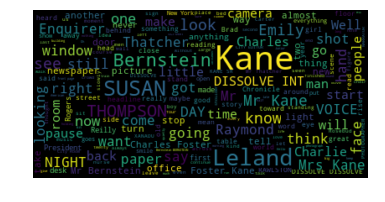

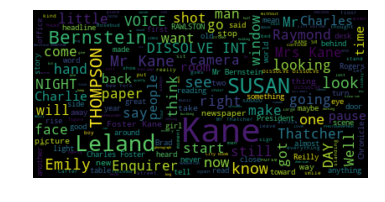

In [15]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()